In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Klasifikasi_dataset_iris.csv") 

In [3]:
data.head(300)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,7.00,3.02,4.07,1.07,iris-versicolor
1,2,6.04,3.02,4.05,1.05,iris-versicolor
2,3,6.09,3.01,4.09,1.05,iris-versicolor
3,4,5.05,2.03,4.00,1.03,iris-versicolor
4,5,6.05,2.08,4.06,1.05,iris-versicolor
5,6,5.07,2.08,4.05,1.03,iris-versicolor
6,7,6.03,3.03,4.07,1.06,iris-versicolor
7,8,4.09,2.04,3.03,3.00,iris-versicolor
8,9,6.06,2.09,4.06,1.03,iris-versicolor
9,10,5.02,2.07,3.09,1.04,iris-versicolor


In [4]:
atributData = data.iloc[:,:-1].values
labelData = data.iloc[:,-1].values

In [5]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mean.fit(atributData[:,:-1])
atributData[:,:-1] = imp_mean.transform(atributData[:,:-1])

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(atributData, labelData, test_size=0.33, random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [8]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[7]])

In [12]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

iris-versicolor       1.00      1.00      1.00         7

       accuracy                           1.00         7
      macro avg       1.00      1.00      1.00         7
   weighted avg       1.00      1.00      1.00         7



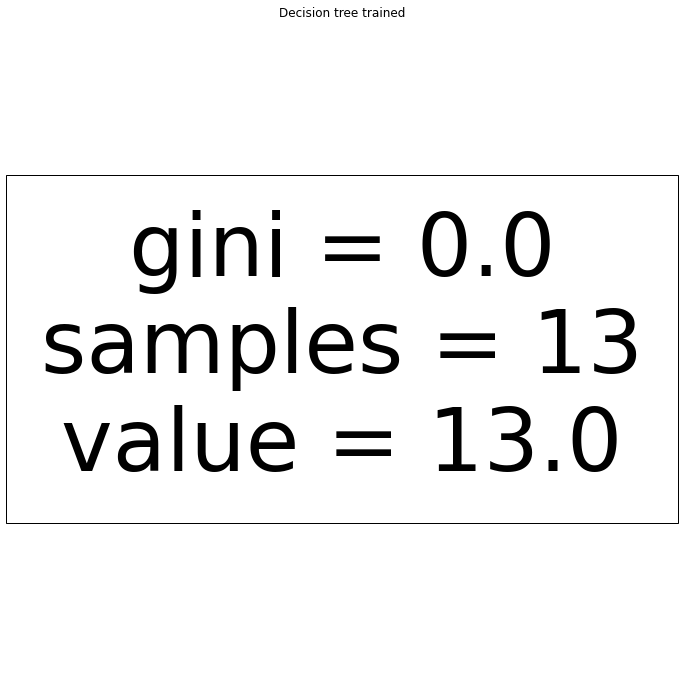

In [13]:
plt.figure(figsize=(12,12))
tree.plot_tree(classifier, feature_names=data.columns.values.tolist(), class_names=data.columns.values.tolist())
plt.title("Decision tree trained")
plt.show()